# Dataset

In [2]:
import pandas as pd
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# preprocessing

In [6]:
x=df.drop('HeartDisease',axis='columns')
y=df['HeartDisease']

In [ ]:
x.shape

(918, 11)

In [7]:
y.shape

(918,)

In [8]:
from sklearn.preprocessing import LabelEncoder
x=x.apply(LabelEncoder().fit_transform)

In [9]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape,x_test.shape

((734, 11), (184, 11))

In [12]:
x_train.iloc[0]

,795
Age,14
Sex,1
ChestPainType,2
RestingBP,22
Cholesterol,98
FastingBS,1
RestingECG,1
MaxHR,116
ExerciseAngina,0
Oldpeak,18


In [13]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [14]:
x_train[0]

array([ 14,   1,   2,  22,  98,   1,   1, 116,   0,  18,   0])

In [15]:
x_test[0]

array([ 35,   0,   1,  41,  53,   0,   1, 105,   0,  10,   2])

In [16]:
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [17]:
x_train[0]

array([0.27083333, 1.        , 0.66666667, 0.33333333, 0.44343891,
       1.        , 0.5       , 0.98305085, 0.        , 0.34615385,
       0.        ])

In [18]:
x_test[0]

array([0.70833333, 0.        , 0.33333333, 0.62121212, 0.239819  ,
       0.        , 0.5       , 0.88983051, 0.        , 0.19230769,
       1.        ])

# Model Definition

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
model=keras.Sequential()
model.add(keras.layers.Dense(units=128,activation='relu',input_shape=(11,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile

In [24]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.binary_crossentropy,metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
hist=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 557ms/step - accuracy: 0.5427 - loss: 0.6858 - val_accuracy: 0.8098 - val_loss: 0.6349
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7777 - loss: 0.6293 - val_accuracy: 0.7663 - val_loss: 0.5610
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7850 - loss: 0.5507 - val_accuracy: 0.7989 - val_loss: 0.4677
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4616 - val_accuracy: 0.7826 - val_loss: 0.4391
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8195 - loss: 0.4231 - val_accuracy: 0.8043 - val_loss: 0.4500
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8122 - loss: 0.4586 - val_accuracy: 0.8098 - val_loss: 0.4229
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8226 - loss: 0.3961 - val_accuracy: 0.8152 - val_loss: 0.4060
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8326 - loss: 0.4052 - val_accuracy: 0.8424 - val_loss: 0.396

# Plot

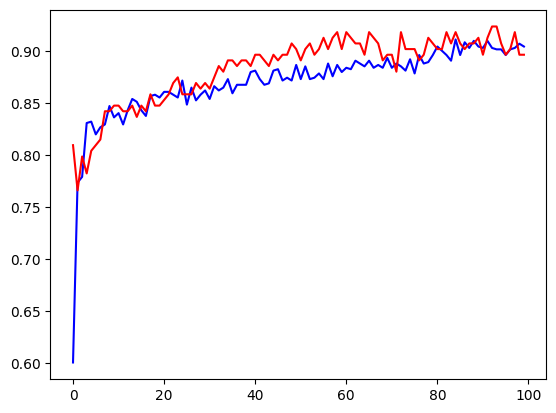

In [27]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],color='blue')
plt.plot(hist.history['val_accuracy'],color='red')

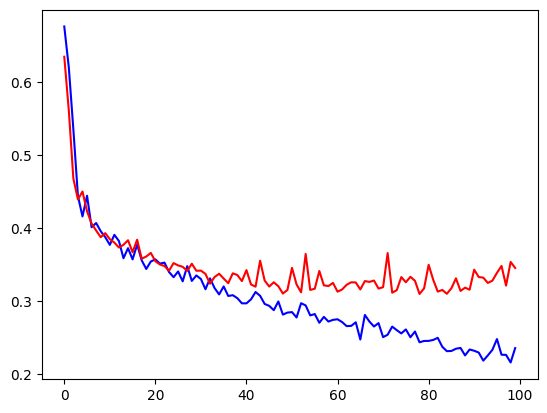

In [28]:
plt.plot(hist.history['loss'],color='blue')
plt.plot(hist.history['val_loss'],color='red')